# Image compression with K-means

# Outline
- [ 1 - Packages ](#1)
- [ 2 -  Problem Statement](#2)
- [ 3 - Dataset](#3)
- [ 4 - K-Means on image pixels](#4)
  - [ 4.1 Finding closest centroids](#4.1)
  - [ 4.2  Computing centroid means](#4.2)
  - [ 4.3 Random initialization](#4.3)
  

## <a name="1"></a>
## 1 - Packages 
- [numpy](https://www.numpy.org) is a powerful package for working with matrices and numerical computations in Python.
- [Matplotlib](https://www.matplotlib.org) is a widely-used library for creating visualizations and graphs in Python.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

## <a name="2"></a>
## 2 - Problem statement
The goal of this project is to apply the K-means algorithm to perform image compression by reducing the number of colors in a 24-bit color representation image to 16 colors. The aim is to retain the essence of the image while efficiently storing it by only storing the RGB values of the 16 selected colors and the index of the color at each pixel location. To achieve this, we will cluster every pixel in the image into 16 groups in the 3-dimensional RGB space using the K-means algorithm. Finally, we will replace the pixels in the original image with the 16 selected colors to produce a compressed image with minimum loss of image quality.

## <a name="3"></a>
## 3 - Datatset

In [49]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

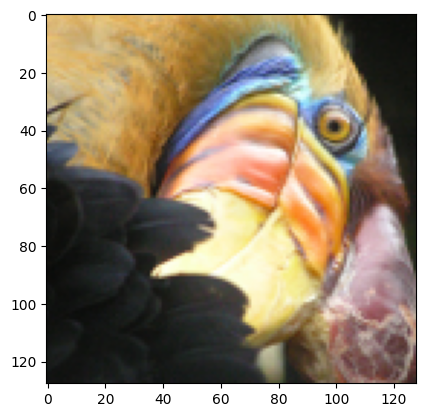

In [50]:
# Visualizing the image
plt.imshow(original_img)

In [51]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [52]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

## <a name="4"></a>
## 4 - K-Means on image pixels

### <a name="4.1"></a>
### 4.1 Finding closest centroids

In [53]:
def find_closest_centroids(X, centroids):
    
  
    K = centroids.shape[0]

 
    idx = np.zeros(X.shape[0], dtype=int)

    
    for i in range(X.shape[0]):
         
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)

   
    
    return idx

In [54]:
initial_centroids = np.array([[0.85882354, 0.7058824 , 0.40392157], [0.25490198, 0.16862746, 0.15294118], [0.05490196, 0.06666667, 0.05098039]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X_img, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0 0 0]


### <a name="4.2"></a>
### 4.2 Computing centroid means

In [55]:
def compute_centroids(X, idx, K):
   
    m, n = X.shape
   
    centroids = np.zeros((K, n))
    
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)

    return centroids

In [56]:
K = 3
centroids = compute_centroids(X_img, idx, K)

print("The centroids are:", centroids)


The centroids are: [[0.80056101 0.68770301 0.51924807]
 [0.31731671 0.27338219 0.23721737]
 [0.08735646 0.09476263 0.08484741]]


In [57]:
def run_kMeans(X, initial_centroids, max_iters=10):
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    
    return centroids, idx

In [58]:
# Load an example dataset
X = X_img

# Set initial centroids
initial_centroids = np.array([[0.85882354, 0.7058824 , 0.40392157], [0.25490198, 0.16862746, 0.15294118], [0.05490196, 0.06666667, 0.05098039]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


## <a name="4.3"></a>
## 4.3 - Random initialization

In [59]:

def kMeans_init_centroids(X, K):
    
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [60]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)


centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [61]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [0 4 4 0 0]


In [62]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

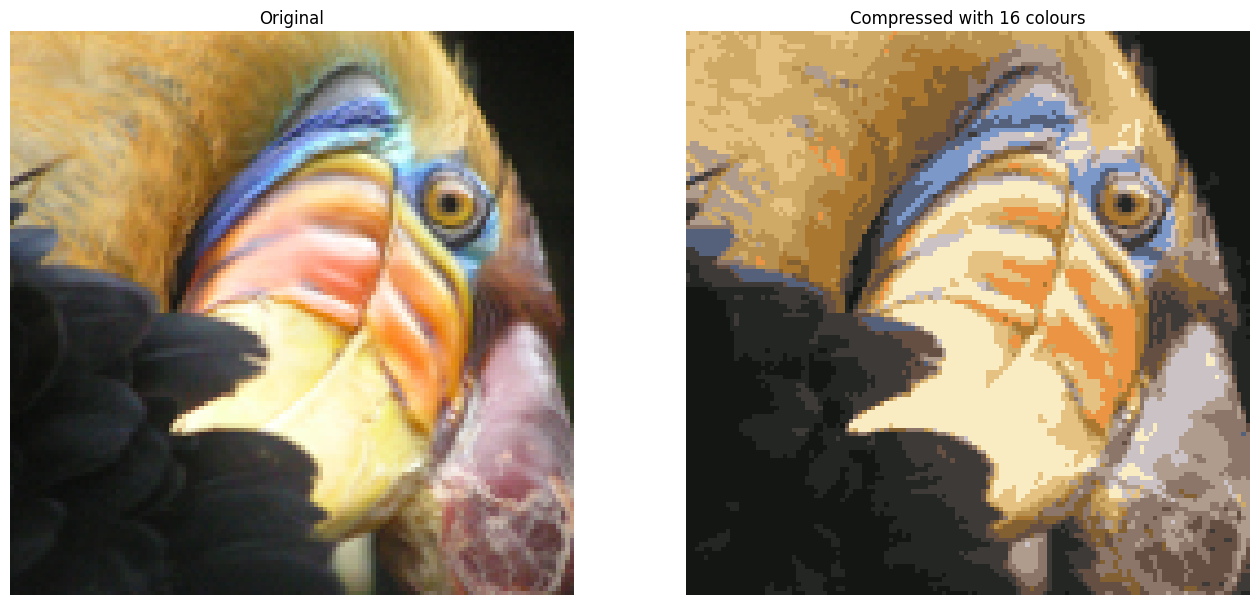

In [63]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()